# Mistral Model

In [2]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

### Sample examples with explanations, predictions and scores

In [3]:
data_save_dir = "/cluster/home/kamara/syntax-shap/data"
batch_size = 64

dataset = "rocstories"
model_name = "mistral"
threshold_ = 0.2


filter_ids_path = os.path.join(data_save_dir, f"{dataset}")
with open(os.path.join(filter_ids_path, f"{dataset}_{model_name}_stats.pkl"), "rb") as f:
    stats = pickle.load(f)

print("Size of the dataset:", stats["n_data"])
print("Size of filtered dataset:", stats["n_filtered"])
print("Maximum number of batches:", stats["n_filtered"]//batch_size)

Size of the dataset: 2275
Size of filtered dataset: 1046
Maximum number of batches: 16


In [15]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/explanations/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-4]
            model_name = parts[-3]
            algorithm = parts[-2]
            seed = parts[-1].split('.pkl')[0]  # Removes the file extension
           
            # Construct the full file path
            file_path = os.path.join(folder_path, file)

            # Read the pickle file
            with open(full_path, 'rb') as file:
                data = pickle.load(file)

            # Assuming the content is a dictionary, create a DataFrame
            df = pd.DataFrame(data)
            # Add the extracted details as new columns
            df['algorithm'] = algorithm
            df['n_token'] = df['input'].str.split().apply(len)
            df['explanation'] = df['explanation'].apply(lambda x: x.reshape(-1))

            # Append to the list of dataframes
            df_list.append(df)

# Concatenate all dataframes in the list
df_explanation = pd.concat(df_list, ignore_index=True)
df_explanation


input_id                                              input  \
0         2513   Many muscles pull on bones to make arms and legs   
1         2571  Network cards enable a computer to exchange da...   
2         4302  People can take medicine when they are in a pl...   
3         3659  Most refugees are illegal immigrants and more ...   
4          702                     Many tourist come to visit the   
...        ...                                                ...   
3459      3108  Duke crash lands back on Earth and finds most ...   
3460      1822     Women compete in modern Olympics for the first   
3461      4516  Many people find gardens relaxing especially i...   
3462      1053             Many books are published every year in   
3463      4029  Some grocery stores are  small community store...   

                                            explanation  algorithm  n_token  
0     [24708.0, 24324.0, -42245.0, -106235.0, -13576...  partition       10  
1     [3022.0, 28860.0, -3857.0, -3773.0, 20062.0, 2...  partition       10  
2     [-10937.0, -11557.0, 33181.0, -6767.0, -7266.0...  partition       13  
3     [-14398.0, 13194.0, -40084.0, -56304.0, -16179...  partition       12  
4     [5289.0, -46035.0, 22986.0, 23180.0, -46906.0,...  partition        6  
...                                                 ...        ...      ...  
3459  [0.052258416311565505, 0.10645440604599797, -0...     syntax       11  
3460  [0.03178319649460573, 0.7135796561890532, 0.01...     syntax        8  
3461  [0.08953206047469879, -0.0196104920048992, -0....     syntax       14  
3462  [0.491059108915298, 0.5361975341612143, -0.163...     syntax        7  
3463  [0.25747558627817463, 0.1678213113282123, -0.2...     syntax       12  

[3464 rows x 5 columns]

In [16]:
#### Select rows which input_ids are in the list of input_ids of the rows with algorithm = 'shap'

# Extract input_id values where algorithm is 'shap'
shap_input_ids = df_explanation[df_explanation['algorithm'] == 'shap']['input_id'].unique()

# Filter the DataFrame to keep rows where input_id is in shap_input_ids
filtered_df_explanation = df_explanation[df_explanation['input_id'].isin(shap_input_ids)]
filtered_df_explanation

input_id                                              input  \
64        1360             People can enjoy music by listening to   
65        2398       Some names are given a long time after their   
66        1566                 Japanese tea have a lot of kind of   
67         558             Many different languages are spoken in   
68        2690    Light can also cause the double bonds to form a   
...        ...                                                ...   
3363       105                          Some animals also can use   
3364      1570          Many people believe there is some form of   
3365      1422  Schools provide special education services to ...   
3366      1273                 Many people like to make their own   
3367      1052  Similar interactions cause the northern lights on   

                                            explanation  algorithm  n_token  
64    [21977.0, -5525.0, 10584.0, 6292.0, 7980.0, 96...  partition        7  
65    [30580.0, 17552.0, 28241.0, 19139.0, 32634.0, ...  partition        9  
66    [23313.0, -63219.0, 74428.0, -7306.0, 3508.0, ...  partition        8  
67    [-34986.0, 8200.0, 9417.0, -25627.0, -2951.0, ...  partition        6  
68    [5041.0, -21349.0, -4202.0, -44406.0, -35668.0...  partition       10  
...                                                 ...        ...      ...  
3363  [0.10385966698105555, 0.03616797591346406, 0.0...     syntax        5  
3364  [0.13284234503094844, 0.13687180542872254, 0.1...     syntax        8  
3365  [0.04788985660917734, 0.15194453477917483, 0.2...     syntax        7  
3366  [-0.007451466236859198, -0.0031032740744304653...     syntax        7  
3367  [0.35558585291522976, 0.05868420349132515, -0....     syntax        7  

[160 rows x 5 columns]

In [17]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if eval(threshold) == threshold_:
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['input'].str.split().apply(len)

                # Append to the list of dataframes
                df_list.append(df)

df_final_single_threshold = pd.concat(df_list, ignore_index=True)
df_final_single_threshold


fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  \
0        0.071085  0.071085 -0.064221     -11.171643       0.2   
1        0.014922  0.014922  0.014922      -9.610638       0.4   
2        0.976259  0.976259  0.881660     -13.791485       0.2   
3        0.002957  0.002957  0.002957      -7.992318       0.2   
4        0.065996  0.036913 -0.007352      -0.819410       0.2   
...           ...       ...       ...            ...       ...   
3453     0.019289  0.019289  0.019289      -9.867365       0.2   
3454     0.990712  0.990712  0.947866     -13.806181       0.1   
3455     0.026280  0.023358 -0.023596      -2.196373       0.0   
3456     0.706688  0.706688  0.706688     -13.468347       0.4   
3457     0.607195  0.607195 -0.038126     -13.316607       0.0   

      prob_diff_at_k  input_id  \
0           0.803024      4698   
1           0.567446      1984   
2           0.914077      3816   
3           0.640184       403   
4           0.691264      2132   
...              ...       ...   
3453        0.684910      4301   
3454        0.973468      5557   
3455        0.925036       820   
3456        0.701136       777   
3457        0.948164      1671   

                                                  input  algorithm  n_token  
0     Most animals live in one type of environment b...  partition       14  
1                  Women gain the right to vote in Utah  partition        8  
2     People are associated with the animal for the ...  partition       12  
3                           Radio also brings music and  partition        5  
4        Earth looks blue when seen from outer space by  partition        9  
...                                                 ...        ...      ...  
3453  Orange trees have dark green shiny leaves and ...     syntax       13  
3454  Japan is separated from the Asian continent by...     syntax       16  
3455       Direct democracy makes decisions by majority     syntax        6  
3456            Primary education is free in government     syntax        6  
3457  School districts are sometimes different from ...     syntax        8  

[3458 rows x 10 columns]

In [18]:
sample = pd.merge(filtered_df_explanation, df_final_single_threshold, on=['input', 'input_id', 'algorithm', 'n_token'])
df_str = pd.read_csv(f"/cluster/home/kamara/syntax-shap/data/{dataset}/{dataset}_{model_name}_{seed}_predictions.csv")
sample_with_y = pd.merge(sample, df_str, on=['input', 'input_id'])

In [19]:
sample_with_y

input_id                                              input  \
0        1360             People can enjoy music by listening to   
1        1360             People can enjoy music by listening to   
2        1360             People can enjoy music by listening to   
3        1360             People can enjoy music by listening to   
4        1360             People can enjoy music by listening to   
..        ...                                                ...   
155      1052  Similar interactions cause the northern lights on   
156      1052  Similar interactions cause the northern lights on   
157      1052  Similar interactions cause the northern lights on   
158      1052  Similar interactions cause the northern lights on   
159      1052  Similar interactions cause the northern lights on   

                                           explanation  algorithm  n_token  \
0    [21977.0, -5525.0, 10584.0, 6292.0, 7980.0, 96...  partition        7   
1    [0.026451325085081846, 0.038440944399347914, -...   syntax-w        7   
2    [-2.2429219857837497e-05, 3.3598871329486205e-...       lime        7   
3    [0.15731970881921256, 0.09945758881116337, 0.1...       shap        7   
4    [0.019282695246186393, 0.02802298234375686, -0...     syntax        7   
..                                                 ...        ...      ...   
155  [-4324.0, 38016.0, 8022.0, -8130.0, 7536.0, 74...  partition        7   
156  [0.3553768468299981, 0.08797456517673462, -0.0...   syntax-w        7   
157  [-5.538417228962153e-06, -8.776801821213842e-0...       lime        7   
158  [0.1276510067114094, 0.0842392506822037, 0.156...       shap        7   
159  [0.35558585291522976, 0.05868420349132515, -0....     syntax        7   

     fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  prob_diff_at_k  \
0       0.473075  0.452468  0.199605      -2.920609       0.2        0.833490   
1       0.478245  0.474786  0.179589      -4.928862       0.2        0.846128   
2       0.478245  0.472733  0.068537      -4.463008       0.2        0.837231   
3       0.096405  0.094727  0.072634      -4.050079       0.0        0.877346   
4       0.477602  0.474113  0.179155      -4.918742       0.2        0.845888   
..           ...       ...       ...            ...       ...             ...   
155     0.747146  0.747146  0.671281     -13.524017       0.2        0.949683   
156     0.747146  0.747146  0.117352     -13.524017       0.2        0.922877   
157     0.747146  0.747146  0.592653     -13.524017       0.1        0.928371   
158     0.747146  0.747146  0.743603     -13.524017       0.2        0.923133   
159     0.747495  0.747495  0.117214     -13.524485       0.2        0.922932   

            y  
0    recorded  
1    recorded  
2    recorded  
3    recorded  
4    recorded  
..        ...  
155     Earth  
156     Earth  
157     Earth  
158     Earth  
159     Earth  

[160 rows x 12 columns]

In [20]:
sample_with_y.to_csv(f"/cluster/home/kamara/syntax-shap/results/samples_{model_name}_{dataset}_{threshold_}.csv", index=False)

### N_tokens vs performance

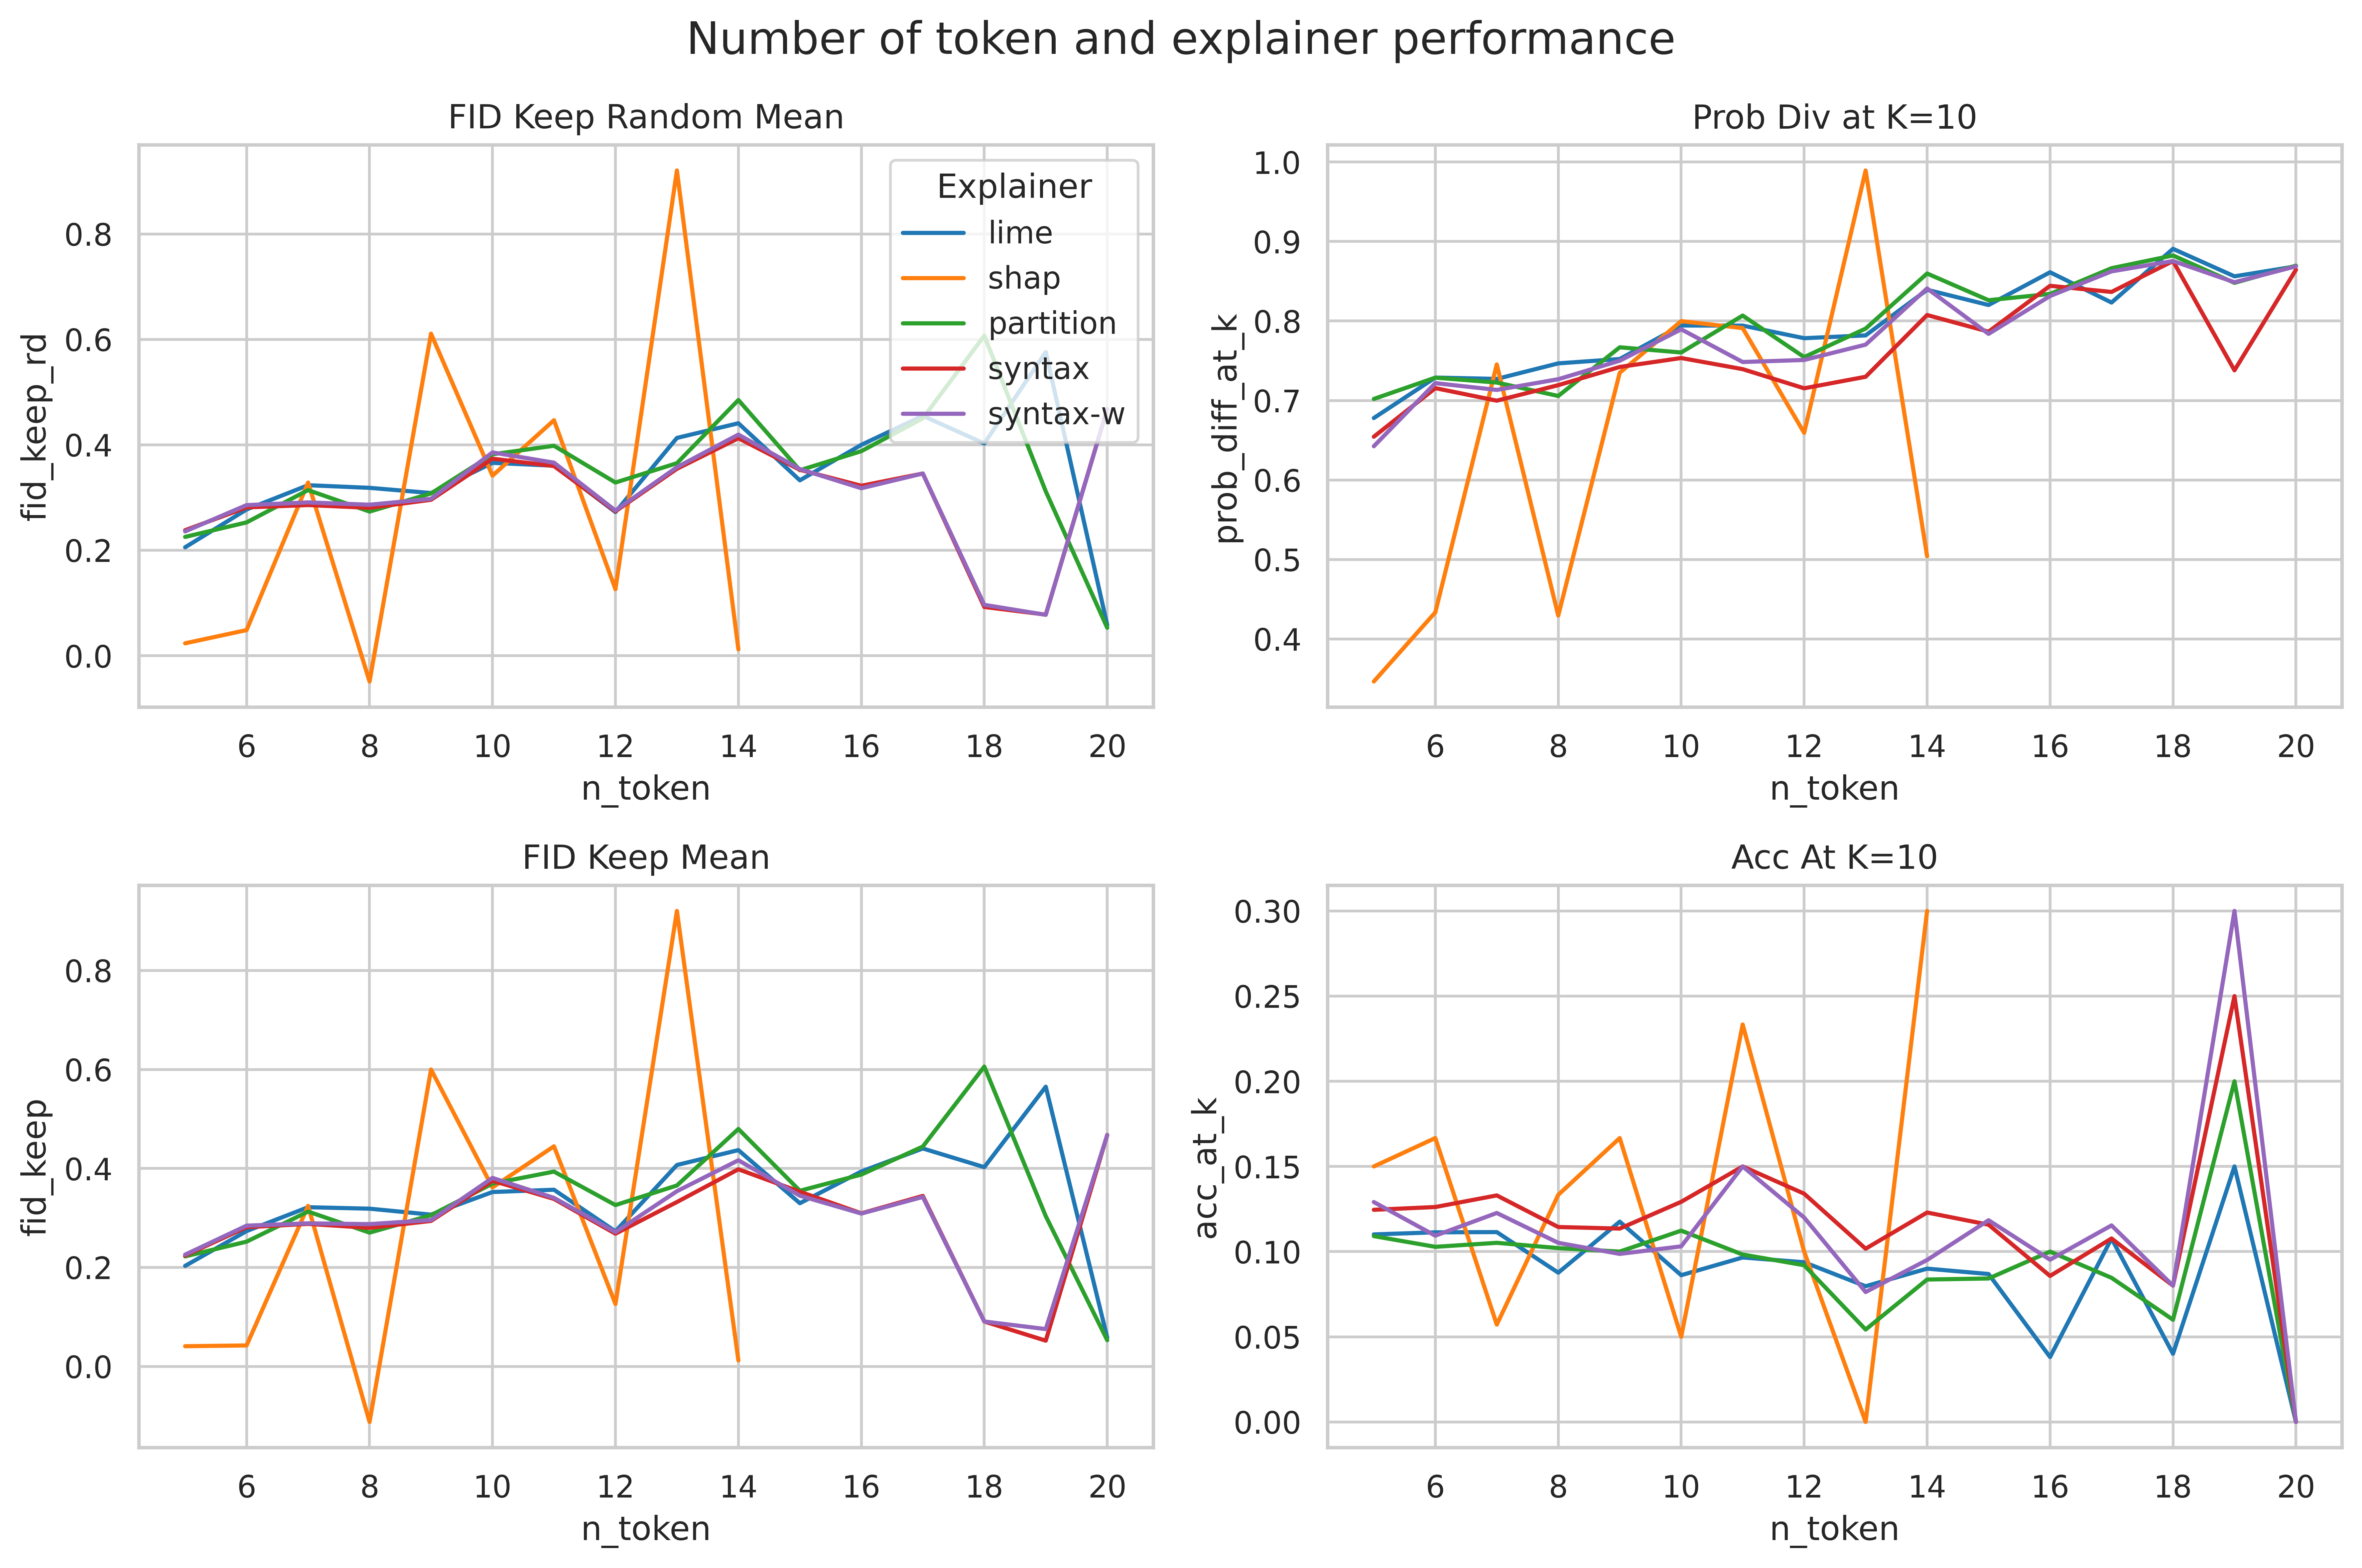

In [74]:
df = df_final_single_threshold.groupby(['algorithm', 'n_token']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)

# Plotting with Seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Creating a lineplot for each score
sns.lineplot(x='n_token', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('FID Keep Random Mean')

sns.lineplot(x='n_token', y='fid_keep', hue='algorithm', data=df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('FID Keep Mean')

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Prob Div at K=10')

sns.lineplot(x='n_token', y='acc_at_k', hue='algorithm', data=df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Acc At K=10')

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot
axes[0, 0].legend(title='Explainer', loc='upper right')

fig.suptitle('Number of token and explainer performance', fontsize=16)

plt.tight_layout()
plt.show()

### Performance at Thresholds

In [4]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            # Construct the full file path
            file_path = os.path.join(folder_path, file)

            # Read the pickle file
            with open(full_path, 'rb') as file:
                data = pickle.load(file)

            # Assuming the content is a dictionary, create a DataFrame
            df = pd.DataFrame(data)

            # Add the extracted details as new columns
            df['algorithm'] = algorithm
            df['n_token'] = df['input'].str.split().apply(len)
            df['threshold'] = eval(threshold)

            # Append to the list of dataframes
            df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  \
0         0.026020  0.026020  0.015344     -10.166660       0.0   
1         0.525244  0.525244  0.398886     -13.171619       0.0   
2         0.023535  0.021639  0.016398      -2.518190       0.1   
3         0.007370  0.007370  0.007370      -8.905312       0.1   
4         0.031653  0.031653 -0.046689     -10.362617       0.0   
...            ...       ...       ...            ...       ...   
37633     0.538499  0.320523  0.582591      -0.774665       0.6   
37634     0.000740 -0.000801  0.000740       0.733186       0.8   
37635     0.064365  0.014903  0.064365      -0.263366       0.8   
37636     0.536786  0.536786  0.536786     -13.193357       0.2   
37637     0.007962 -0.008185  0.168879       0.047327       0.7   

       prob_diff_at_k  input_id  \
0            0.634664       677   
1            0.906619      1804   
2            0.612839      1169   
3            0.473995        31   
4            0.747616       532   
...               ...       ...   
37633        0.153355      1597   
37634        0.098779      1014   
37635        0.048494       392   
37636        0.762018       380   
37637        0.060083      1875   

                                                   input  algorithm  n_token  \
0                    I bought a new laptop from the shop  partition        8   
1      Many kids smiled back at him and John knew he ...  partition       14   
2               We knew no one would want to buy an ugly  partition       10   
3                        She eventually stopped after an  partition        5   
4                         He sent his resume out to many  partition        7   
...                                                  ...        ...      ...   
37633  I turned the paper in early and got a good gra...     syntax       12   
37634      Lisa decided to stop at a gas station and buy     syntax       10   
37635                             Last month I got a new     syntax        6   
37636                     He started speaking in a lower     syntax        6   
37637  When he reached up to take off his shirt his a...     syntax       14   

       threshold  
0            0.2  
1            0.2  
2            0.2  
3            0.2  
4            0.2  
...          ...  
37633        0.9  
37634        0.9  
37635        0.9  
37636        0.9  
37637        0.9  

[37638 rows x 11 columns]

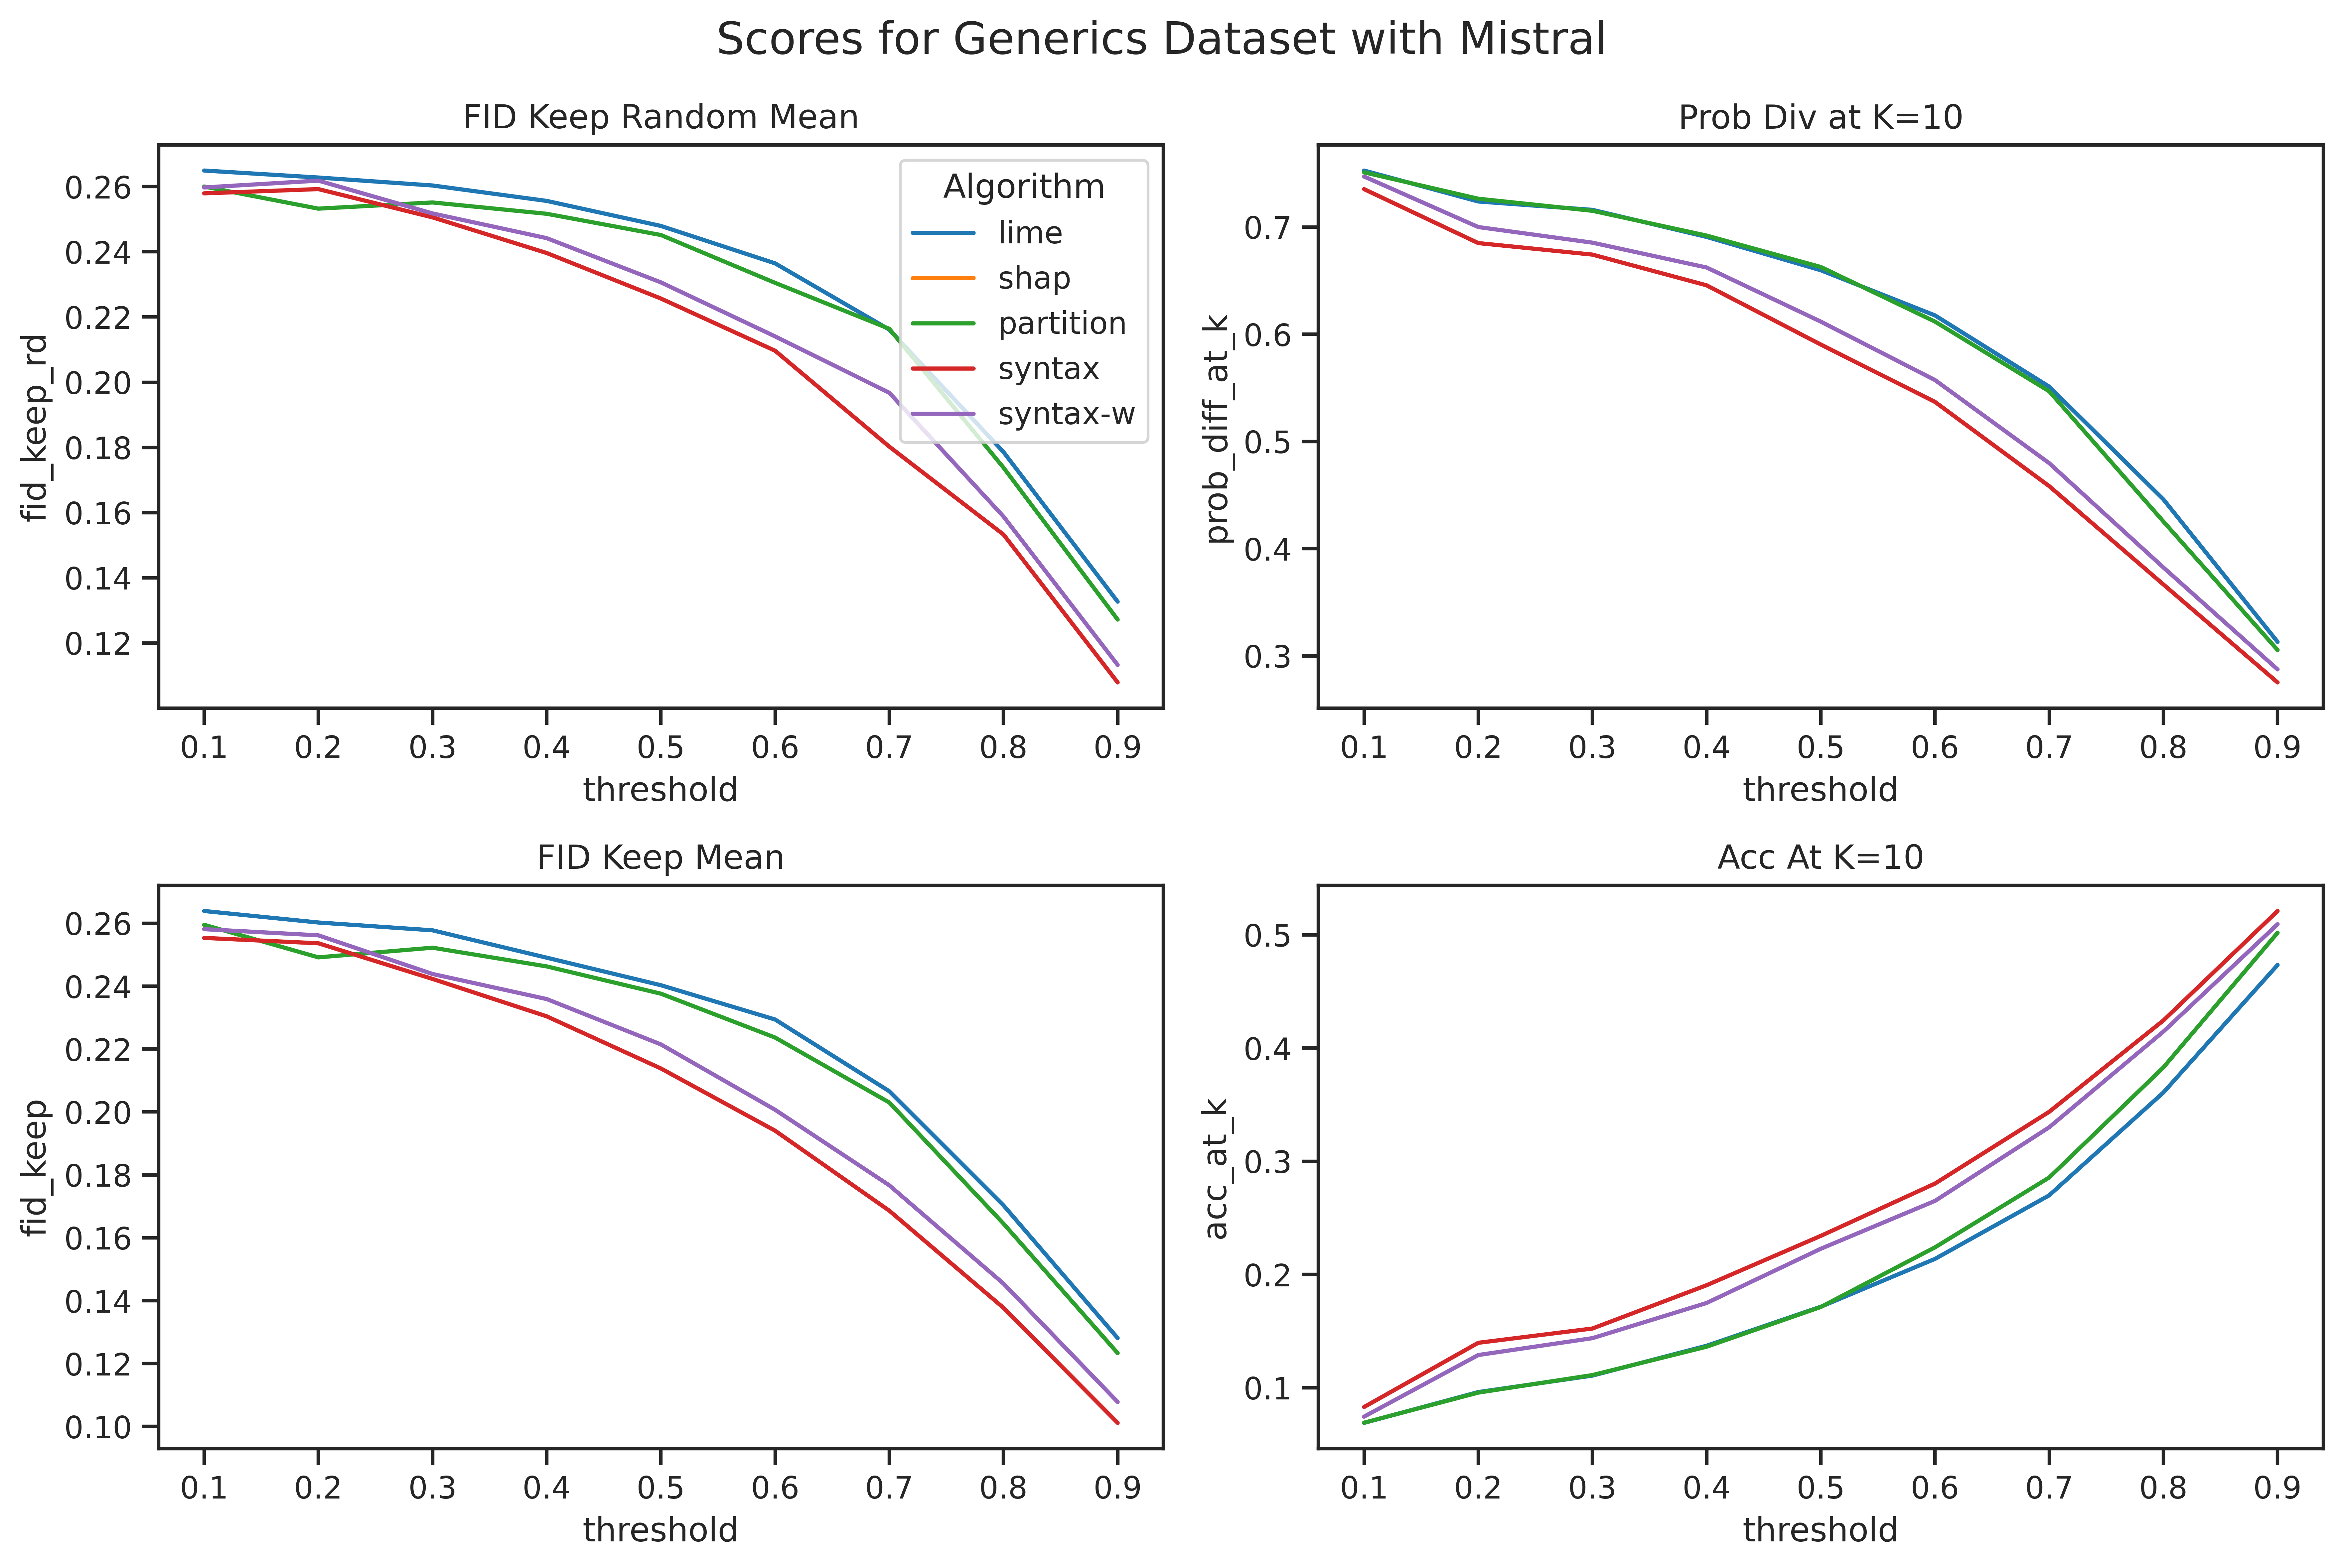

In [5]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = df_final.groupby(['algorithm', 'threshold']).mean().reset_index()
# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)

# Plotting with Seaborn
sns.set(style="ticks")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('FID Keep Random Mean')

sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('FID Keep Mean')

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Prob Div at K=10')

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Acc At K=10')

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot
axes[0, 0].legend(title='Algorithm', loc='upper right')

fig.suptitle('Scores for Generics Dataset with Mistral', fontsize=16)

plt.tight_layout()
plt.show()


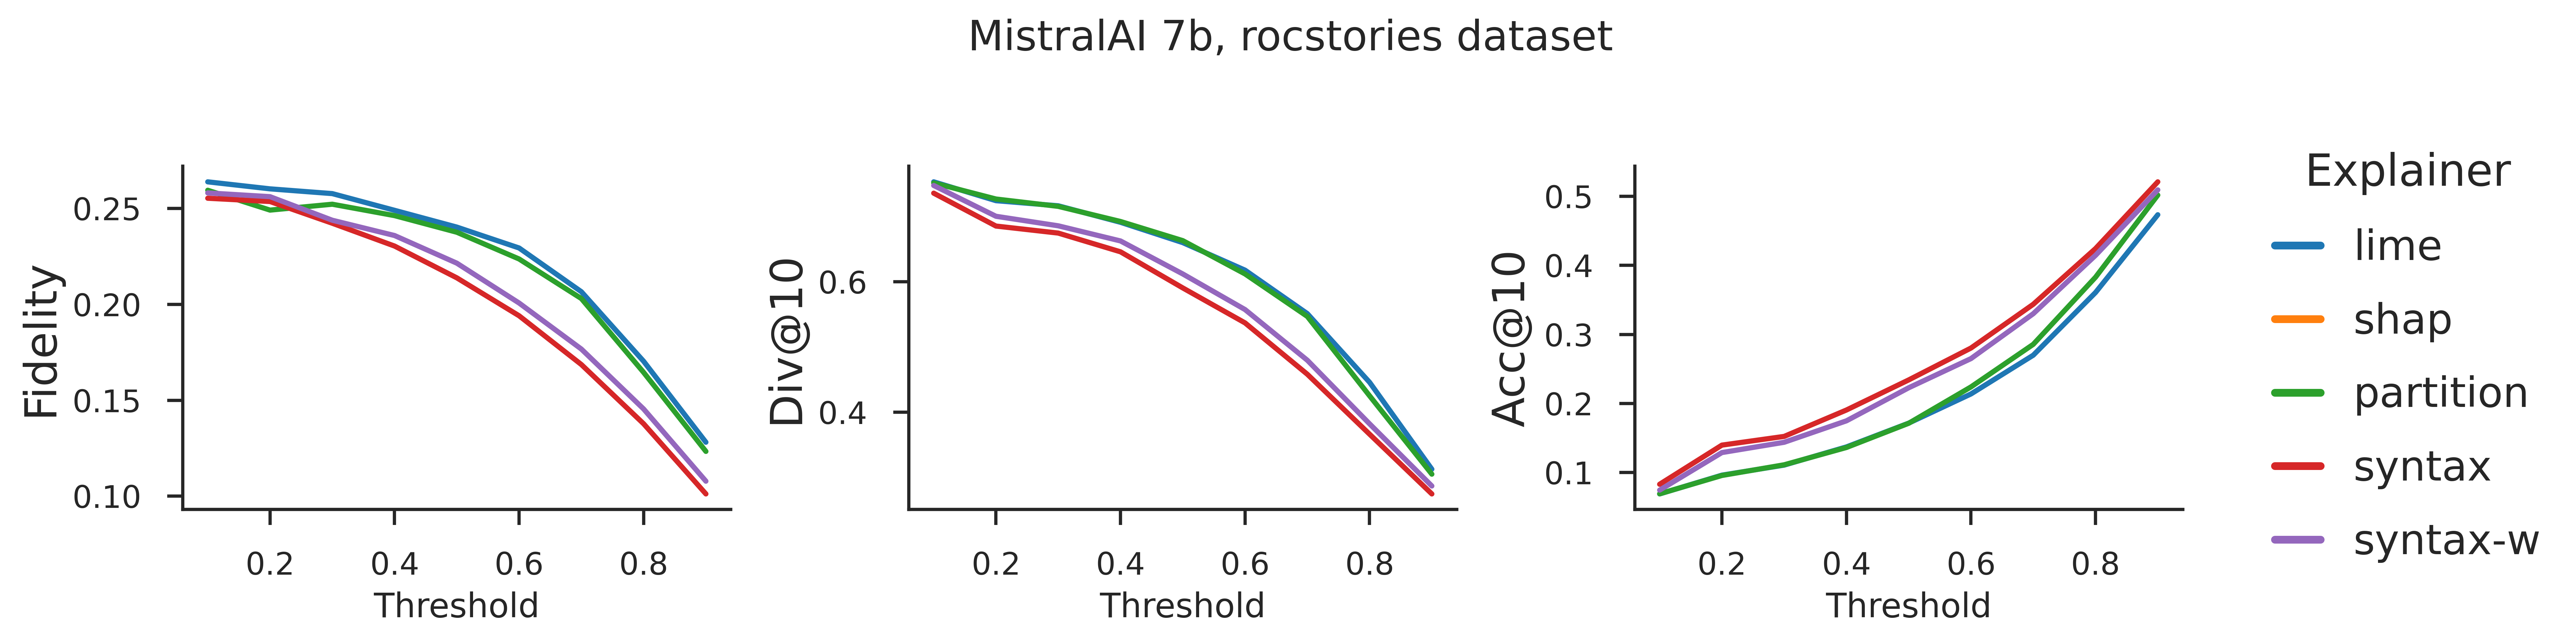

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'threshold']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)


fig, axes = plt.subplots(1, 3, figsize=(14,3.5))

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=palette, linewidth=2)
axes[0].set_title('')
axes[0].set_xlabel('Threshold', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=palette, linewidth=2)
axes[1].set_title('')
axes[1].set_xlabel('Threshold', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=palette, linewidth=2)
axes[2].set_title('')
axes[2].set_xlabel('Threshold', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
legend = axes[2].legend(title='Explainer', loc='upper left', bbox_to_anchor=(1.1, 1.15), fontsize=16, frameon=False, handlelength=1.1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(3)  # Increase line width in legend

fig.suptitle(f'MistralAI 7b, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
plt.tight_layout()
plt.show()

fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/scores_{model_name}_{dataset}.pdf", bbox_inches='tight', dpi=600)
